In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("/Users/vanshika/Desktop/codsoft/task2/advertising.csv")

print("First 5 rows of data:")
print(data.head())

# Step 3: Explore the data
print("\nChecking for missing values:")
print(data.isnull().sum())




First 5 rows of data:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Checking for missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [8]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


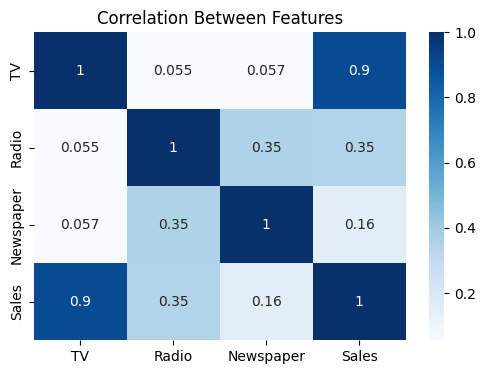

In [9]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(6,4))
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Features")
plt.show()

In [10]:
# Step 4: Prepare data (features and target)
X = data[["TV", "Radio", "Newspaper"]]   # independent variables
y = data["Sales"]                        # dependent variable

# Step 5: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

In [11]:
# Step 8: Check performance
print("\nModel Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 9: Compare actual vs predicted
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nSample Predictions:")
print(results.head())



Model Performance:
Mean Squared Error: 2.9077569102710896
R² Score: 0.9059011844150826

Sample Predictions:
     Actual  Predicted
95     16.9  17.034772
15     22.4  20.409740
30     21.4  23.723989
158     7.3   9.272785
128    24.7  21.682719


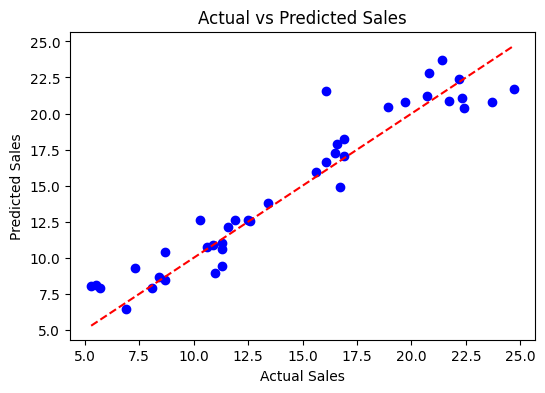

In [12]:
# Plot actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()